In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision
from torch.autograd import Variable
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [8]:
train_data=datasets.MNIST(root='D:\Mis\project\python\dataMine\data',
 #数据存放位置
train=True, #提取训练集
transform=transforms.Compose([
transforms.ToTensor(),#转换为张量
transforms.Normalize([0.1307,], [0.3081, ]) #用0.1307, 0. 3081规范化
]),
download=True 
)#衣没有找到数据集时下载
train_loader=DataLoader(dataset=train_data,batch_size=64,shuffle=True)
test_data=datasets.MNIST(root='D:\Mis\project\python\dataMine\data',
train=False,
transform=transforms.Compose([
transforms.ToTensor(), #转换为张量
transforms.Normalize([0.1307,], [0.3081, ]) #ft用0.1307, 0. 3081规范化
]))
test_loader=DataLoader(dataset=test_data,batch_size=64,shuffle=True)

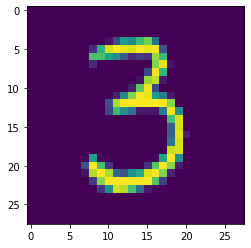

In [9]:
img=train_data[50][0].numpy()
label=train_data[50][1]
plt.imshow(img[0,:])
plt.show()

In [11]:
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.convl=nn.Conv2d(1,4,5,padding=2) #输出3个通道， 5*5卷积， 填充1 尺寸28》24
        self.pool=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(4,8,5,padding=2)   #输出6个通道， 3*3卷积， 填充1 尺寸24》20
        
        self.fc1=nn.Linear((28*28)//(4*4) *8,512)
        self.fc2=nn.Linear(512,10)
        self.bnl=nn.BatchNorm2d(3, affine=True) #BatchNorm层
        self.bn2=nn.BatchNorm2d(6, affine=True) #BatchNorm层
        self.dropout = nn.Dropout(0.2)
    def forward(self,x):
        x=self.convl(x) #第一层卷积
        x=self.bnl(x)
        x=F.relu(x) 
        
        x=self.conv2 (x) #第二层卷积,池化
        x=self.bn2(x) 
        x=F.relu(x) 
        x=self.pool(x)
        x=x.view(-1,(28*28)//(4*4) * 8) #展开成一维特征向量作为全连接的输入 
        x=self.fc1(x)
        x=F.relu(x)
        
        x=self.fc2(x) 
        return x
    
    def feature_maps(self,x): #获取特征图
        map1=self.convl(x)
        map1=self.bnl(x)
        map1=F.relu(map1)
        map2=self.pool(map1)
        map2=self.conv2(map2)
        map2=self.bn2(x)
        map2=F.relu(map2)
        
        return (map1,map2)

In [13]:
net = model()
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.SGD(net.parameters(),lr = 0.001,momentum=0.9)

for epoch in range(20):
    for i,data in enumerate(train_loader):
        x,y=data
        net.train()#打开dropout
        pred=net(x)
        loss=loss_fn(pred,y)
        opt.zero_grad()
        loss.backward()
        opt.step()

RuntimeError: running_mean should contain 4 elements not 3

In [ ]:
def rightness(pred, labels):
    
    pred=torch.max(pred.data,1)[1]
    rights=pred.eq(labels.data.view_as (pred)).sum() 
    return rights, len(labels)
    

In [ ]:
rights=0
length=0
for i,data in enumerate(test_loader):
    x,y=data
    net.eval() #关闭dropout
    pred=net(x)
    rights=rights+rightness(pred,y)[0]
    length=length+rightness(pred,y)[1]
print(rights,length,rights/length)

tensor(9903) 10000 tensor(0.9903)


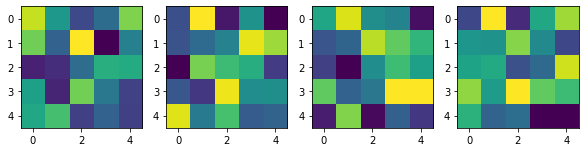

RuntimeError: running_mean should contain 1 elements not 3

In [14]:
plt.figure(figsize=(10,8))
for i in range(4):
    plt.subplot(1,4,i+1) #1行4列，
    plt.imshow(net.convl.weight.data.numpy()[i,0,:])
plt.show()
x=train_data[50][0].unsqueeze(0)
map1,map2=net.feature_maps(x)
for i in range(4):
    plt.subplot(1,4,i+1) #1行4列，
    plt.imshow(map[0,i,:].data.numpy())
plt.show()

for i in range(8):
    plt.subplot(2,4,i+1) #2行4列，
    plt.imshow(map2[0,i,:].data.numpy0) #第二层特征图
plt.show()